In [1]:
# To predict if the client will subscribe a Term Deposit
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system


In [2]:
# Load and review data
data = pd.read_csv("bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
# Five point summary
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# Finding missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [6]:
#checking for duplicates in the dataset
dupes = data.duplicated()
sum(dupes)

0

In [7]:
#checking for null values in the dataset
data.isnull().sum().sum()

0

In [8]:
# Convert categorical variables into integers.
print(data.job.value_counts())
print(data.marital.value_counts())
print(data.education.value_counts())
print(data.default.value_counts())
print(data.housing.value_counts())
print(data.loan.value_counts())
print(data.contact.value_counts())
print(data.month.value_counts())
print(data.poutcome.value_counts())
print(data.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [9]:
replaceStruct = {
                "job": {"blue-collar": 1, "management": 2, "technician": 3, "admin.": 4, "services": 5, "retired": 6, "self-employed": 7, "entrepreneur": 8, "unemployed": 9, "housemaid":10, "student": 11, "unknown": -1},
                "marital": {"single": 1, "married": 2, "divorced": 3},
                "education": {"primary": 1, "secondary": 2, "tertiary": 3, "unknown": -1},
                "default": {"no": 1, "yes":2},
                "housing": {"no": 1, "yes":2},
                "loan": {"no": 1, "yes":2},
                "contact": {"cellular": 1, "telephone": 2, "unknown": -1},
                "month": {"jan": 1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12},
                "poutcome": {"success":1, "other":2, "failure":3, "unknown":-1},
                "Target": {"no": 0, "yes":1}
                }


In [10]:
data=data.replace(replaceStruct)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,2,3,1,2143,2,1,-1,5,5,261,1,-1,0,-1,0
1,44,3,1,2,1,29,2,1,-1,5,5,151,1,-1,0,-1,0
2,33,8,2,2,1,2,2,2,-1,5,5,76,1,-1,0,-1,0
3,47,1,2,-1,1,1506,2,1,-1,5,5,92,1,-1,0,-1,0
4,33,-1,1,-1,1,1,1,1,-1,5,5,198,1,-1,0,-1,0


In [11]:
data.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
Target       int64
dtype: object

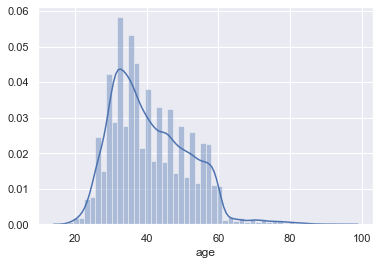

In [12]:
# Univariate analysis
# 'age' is left skewed. 
sns.distplot(data['age'])

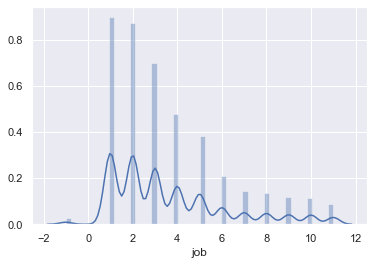

In [13]:
sns.distplot(data['job'])
#'Job': Blue collar, management, technician are high compared to remaining jobs.

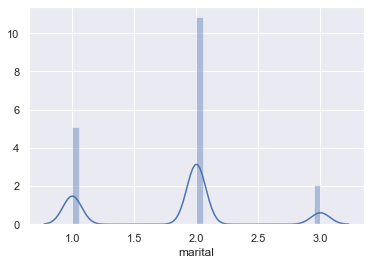

In [14]:
sns.distplot(data['marital'])
# Married people are high compared to single and divorced. '2': married, '1': single, '3': divorced

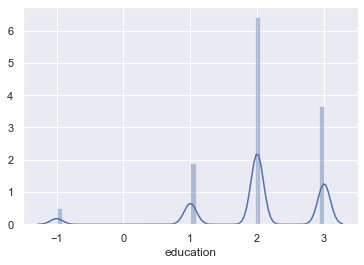

In [15]:
sns.distplot(data['education'])
# Secondary educated are high compared to primary and tertiary. '2': secondary, '3': tertiary, '1': primary

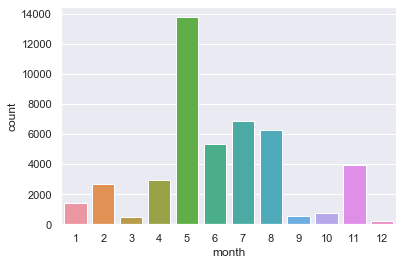

In [16]:
# May month is having highest number of counts. '5': may
sns.countplot(data['month'])

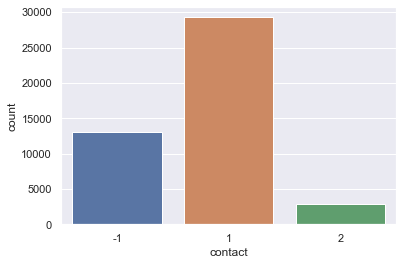

In [17]:
sns.countplot(data['contact'])
# Cellular contacts are high compared to telephone and unknown. '1': Cellular, '2': telephone, '-1': unknown

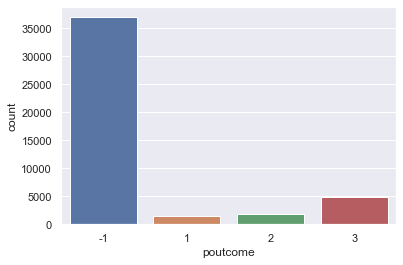

In [18]:
sns.countplot(data['poutcome'])

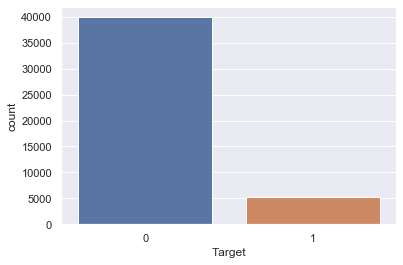

In [19]:
# Target column distribution.
# Term Deposit subscribers are very low. '0' indicates count of people who do not subscribe TD, '1' indicates subscribed. 
sns.countplot(data['Target'])

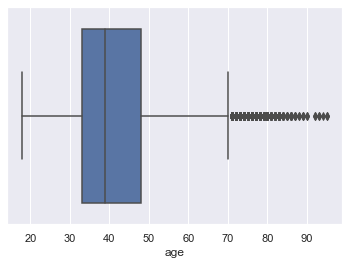

In [20]:
# Box plot for finding outliers in the dataset.
sns.boxplot(data['age'])

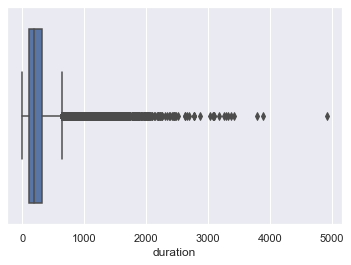

In [21]:
sns.boxplot(data['duration'])

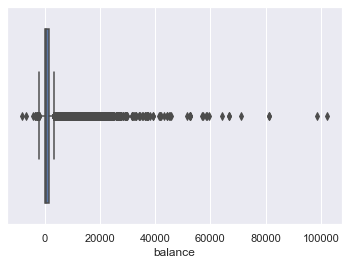

In [22]:
sns.boxplot(data['balance'])

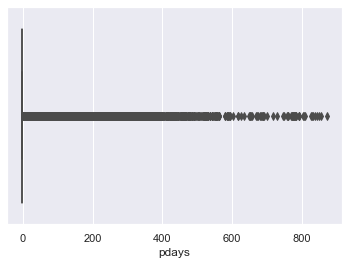

In [23]:
sns.boxplot(data['pdays'])

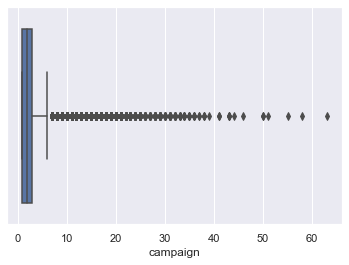

In [24]:
sns.boxplot(data['campaign'])

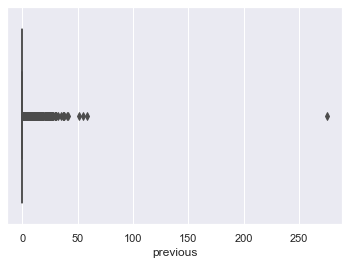

In [25]:
sns.boxplot(data['previous'])

In [26]:
# Filling outliers with upper quartile(Q3)
# Naming with age1, balance1, duration1, campaign1, pdays1, previous1
data["age1"]= np.where(data["age"]>=48,48,data["age"])
data["balance1"]=np.where(data["balance"]>=1428,1428,data["balance"])
data["balance1"]=np.where(data["balance"]<=72,72,data["balance"])
data["duration1"]= np.where(data["duration"]>=319,319,data["duration"])
data["campaign1"]= np.where(data["campaign"]>=3,3,data["campaign"])
data["pdays1"]= np.where(data["pdays"]>=-1,-1,data["pdays"])
data["previous1"]= np.where(data["previous"]>=0,0,data["previous"])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,Target,age1,balance1,duration1,campaign1,pdays1,previous1
0,58,2,2,3,1,2143,2,1,-1,5,...,-1,0,-1,0,48,2143,261,1,-1,0
1,44,3,1,2,1,29,2,1,-1,5,...,-1,0,-1,0,44,72,151,1,-1,0
2,33,8,2,2,1,2,2,2,-1,5,...,-1,0,-1,0,33,72,76,1,-1,0
3,47,1,2,-1,1,1506,2,1,-1,5,...,-1,0,-1,0,47,1506,92,1,-1,0
4,33,-1,1,-1,1,1,1,1,-1,5,...,-1,0,-1,0,33,72,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,3,2,3,1,825,1,1,1,17,...,-1,0,-1,1,48,825,319,3,-1,0
45207,71,6,3,1,1,1729,1,1,1,17,...,-1,0,-1,1,48,1729,319,2,-1,0
45208,72,6,2,2,1,5715,1,1,1,17,...,184,3,1,1,48,5715,319,3,-1,0
45209,57,1,2,2,1,668,1,1,2,17,...,-1,0,-1,0,48,668,319,3,-1,0


In [27]:
# Dropping age, balance,duration,campaign, pdays and previous colomuns.
data = data.drop(['age','balance', 'duration', 'campaign', 'pdays', 'previous'], axis=1)
data

,job,marital,education,default,housing,loan,contact,day,month,poutcome,Target,age1,balance1,duration1,campaign1,pdays1,previous1
0,2,2,3,1,2,1,-1,5,5,-1,0,48,2143,261,1,-1,0
1,3,1,2,1,2,1,-1,5,5,-1,0,44,72,151,1,-1,0
2,8,2,2,1,2,2,-1,5,5,-1,0,33,72,76,1,-1,0
3,1,2,-1,1,2,1,-1,5,5,-1,0,47,1506,92,1,-1,0
4,-1,1,-1,1,1,1,-1,5,5,-1,0,33,72,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,2,3,1,1,1,1,17,11,-1,1,48,825,319,3,-1,0
45207,6,3,1,1,1,1,1,17,11,-1,1,48,1729,319,2,-1,0
45208,6,2,2,1,1,1,1,17,11,1,1,48,5715,319,3,-1,0
45209,1,2,2,1,1,1,2,17,11,-1,0,48,668,319,3,-1,0


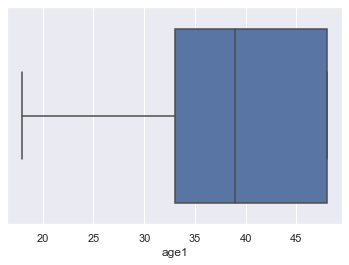

In [63]:
sns.boxplot(data['age1'])

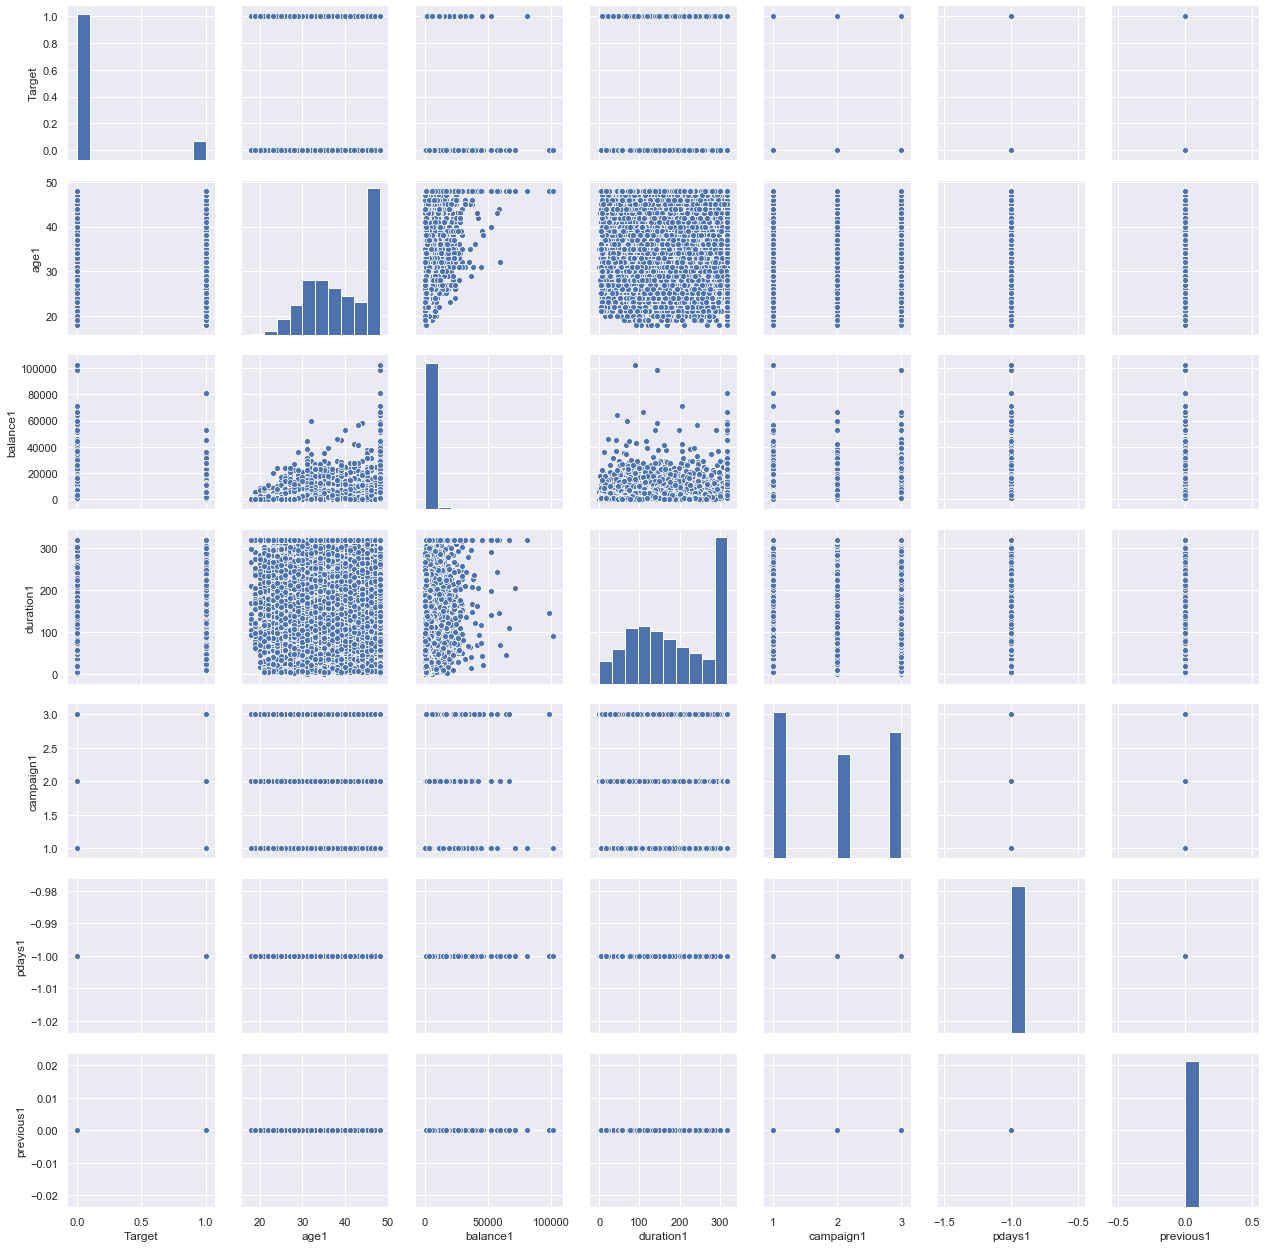

In [28]:
# Multi variate analysis
sns.pairplot(data[['Target', 'age1', 'balance1', 'duration1', 'campaign1', 'pdays1', 'previous1']])


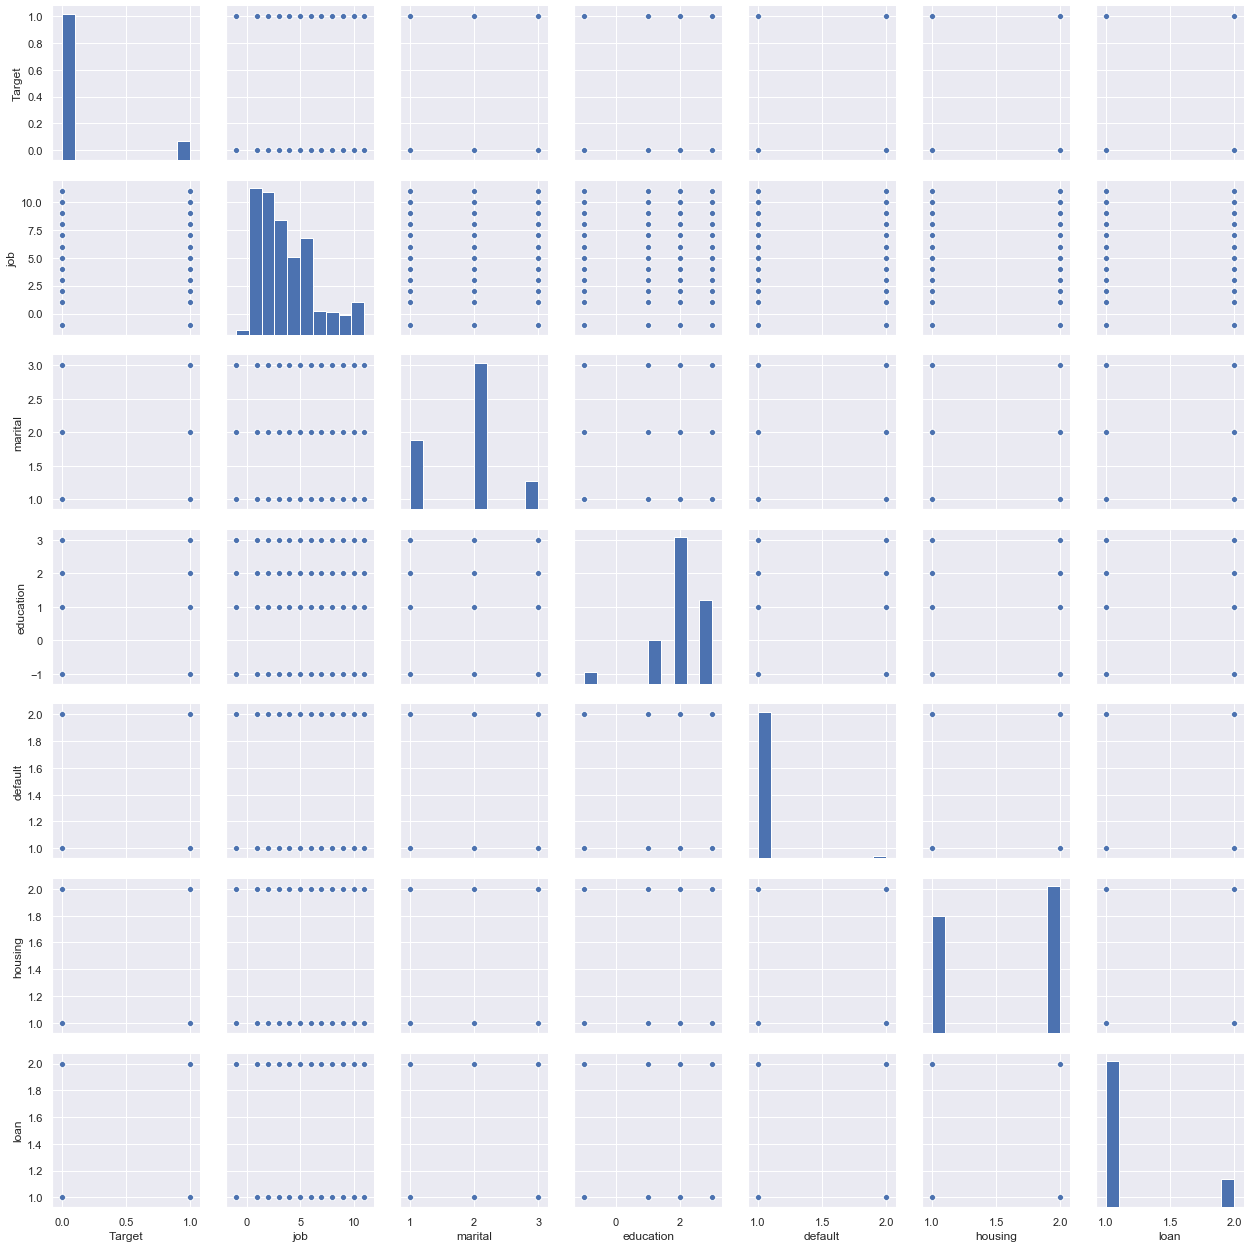

In [29]:
sns.pairplot(data[['Target','job','marital','education','default','housing','loan']])

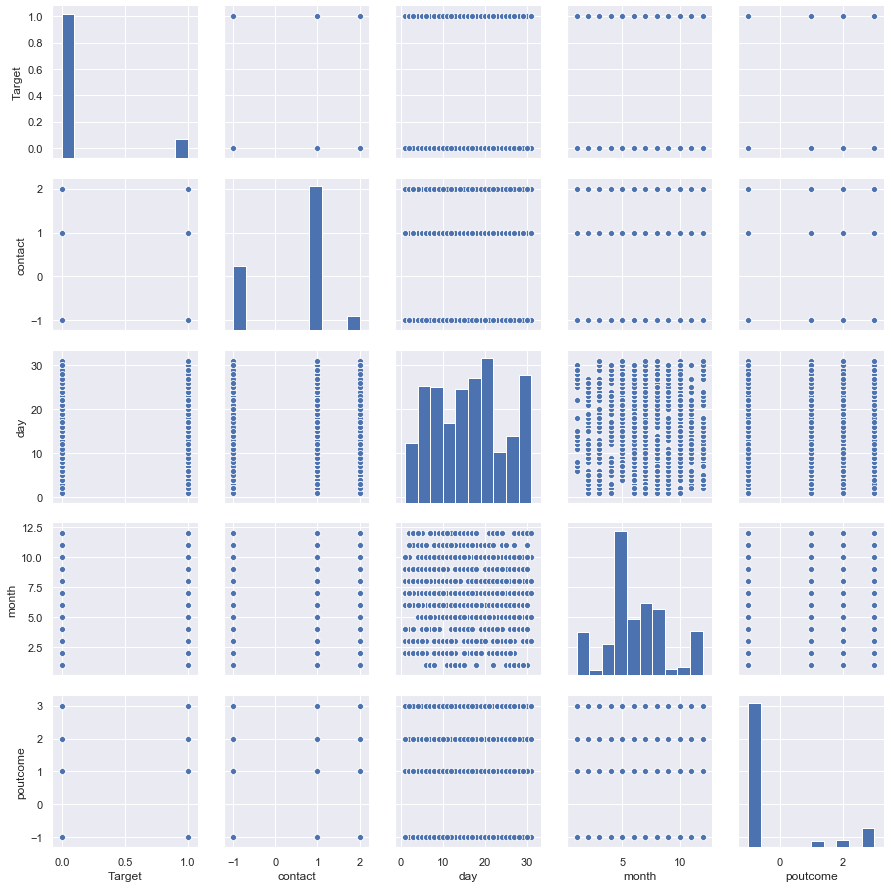

In [30]:
sns.pairplot(data[['Target','contact','day','month','poutcome']])

In [31]:
data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day', 'month', 'poutcome', 'Target', 'age1', 'balance1', 'duration1',
       'campaign1', 'pdays1', 'previous1'],
      dtype='object')

In [32]:
# Split data
x = data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day', 'month', 'poutcome', 'age1', 'balance1', 'duration1',
       'campaign1', 'pdays1', 'previous1']]
y = data['Target']

In [33]:
from sklearn.preprocessing import MinMaxScaler
# Transform the data i.e, scaling the data.
scalar = MinMaxScaler()
scalar.fit(x)
New_data = scalar.transform(x)
New_data

array([[0.25      , 0.5       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.75      , 0.5       , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.58333333, 0.5       , 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.16666667, 0.5       , 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.75      , 0.5       , 0.75      , ..., 0.5       , 0.        ,
        0.        ]])

In [34]:
# Split x and y into training and test set in 70:30 ratio.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state= 1)
x_train.head()

,job,marital,education,default,housing,loan,contact,day,month,poutcome,age1,balance1,duration1,campaign1,pdays1,previous1
6149,1,2,2,2,2,1,-1,27,5,-1,32,72,319,1,-1,0
12403,4,1,2,1,2,2,-1,27,6,-1,34,72,111,3,-1,0
21645,3,2,2,1,2,1,1,19,8,-1,32,266,168,2,-1,0
29580,1,2,2,2,1,2,1,3,2,-1,36,72,150,3,-1,0
31245,11,1,2,1,1,1,1,3,3,-1,23,486,87,1,-1,0


In [35]:
# Logistic Regression

# Creating logistic regression model and the performance
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = "liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

# Accurcay score
model_score = model.score(x_test, y_test)
print(model_score)

0.8852845768209967


In [36]:
# confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0])
print(cm)

[[  196  1355]
 [  201 11812]]


In [37]:
# Create ROC curve
# Calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc= roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(x_test)[:,1])


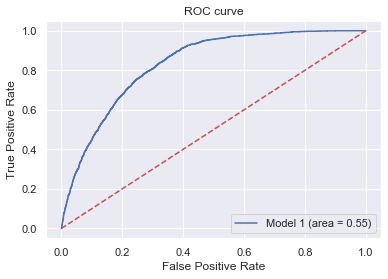

In [38]:
plt.figure()
plt.plot(fpr,tpr, label = "Model 1 (area = %0.2f)" % Log_ROC_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.show()

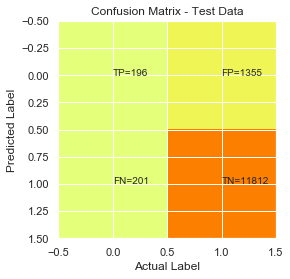

In [39]:
# Confusion matrix(cm)
cm = metrics.confusion_matrix(y_test, y_predict,labels = [1,0])
plt.clf()
plt.imshow(cm, interpolation= 'nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')
s= [['TP', 'FP'], ['FN', 'TN']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ "="+str(cm[i][j]))
plt.show()

In [40]:
# Build Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
TD_model = GaussianNB()
TD_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
# Performance of our model with training data
TD_train_predict = TD_model.predict(x_train)
from sklearn import metrics

# model accuracy for training data
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, TD_train_predict)))
print()

Model Accuracy: 0.8527



In [42]:
# Performance of our model with testing data
TD_test_predict = TD_model.predict(x_test)
from sklearn import metrics

# model accuracy for testing data
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, TD_test_predict)))
print()

Model Accuracy: 0.8542



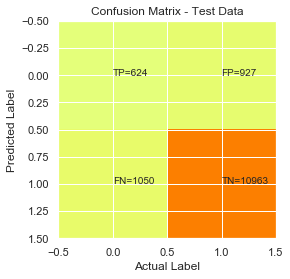

In [43]:
# Lets check confusion matrix and classification report
cm = metrics.confusion_matrix(y_test, TD_test_predict, labels = [1,0])
plt.clf()
plt.imshow(cm, interpolation= 'nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')
s= [['TP', 'FP'], ['FN', 'TN']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ "="+str(cm[i][j]))
plt.show()

In [44]:
# Confusion matrix(cm)
cm = metrics.confusion_matrix(y_test, TD_test_predict, labels = [1,0])
print(cm)

[[  624   927]
 [ 1050 10963]]


In [45]:
# Accuracy score
print(metrics.accuracy_score(y_test, TD_test_predict))

0.8542465349454438


In [ ]:
# Logistic Regression model gave high accuracy compared to Naive Bayes classifier.
# Logistic Regression = 88.528, Naive Bayes classifier = 85.424

In [46]:
# Build Decision Tree Model

dTree = DecisionTreeClassifier(criterion = 'entropy', random_state =1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [47]:
# Scoring the Decision Tree
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.9999052042847664
0.8613240931878502


In [49]:
# Reducing over fitting (Regularization)

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state =1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.8848232059910892
0.8900766735476261


In [62]:
print(pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = x_train.columns))

                Imp
job        0.000000
marital    0.000000
education  0.000000
default    0.000000
housing    0.033754
loan       0.000000
contact    0.098396
day        0.000000
month      0.033976
poutcome   0.286346
age1       0.000000
balance1   0.000000
duration1  0.547528
campaign1  0.000000
pdays1     0.000000
previous1  0.000000


0.8900766735476261


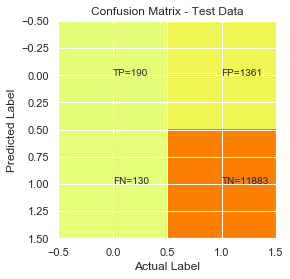

In [52]:
# Accuracy score
print(dTreeR.score(x_test, y_test))
y_predict = dTreeR.predict(x_test)

# Confusion matrix(cm)
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0])
plt.clf()
plt.imshow(cm, interpolation= 'nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')
s= [['TP', 'FP'], ['FN', 'TN']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ "="+str(cm[i][j]))
plt.show()

In [54]:
# Ensemble learning - Bagging
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator = dTree, n_estimators=50, random_state=1)
bgcl = bgcl.fit(x_train, y_train)

0.895532291359481


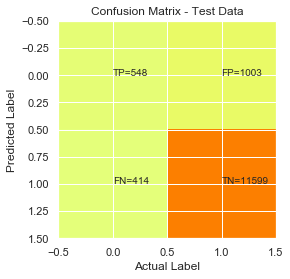

In [55]:
y_predict = bgcl.predict(x_test)
# Accuracy score
print(bgcl.score(x_test, y_test))

# Confusion matrix(cm)
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0])
plt.clf()
plt.imshow(cm, interpolation= 'nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')
s= [['TP', 'FP'], ['FN', 'TN']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ "="+str(cm[i][j]))
plt.show()

In [56]:
# Ensemble learning - AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator = dTree, n_estimators=10, random_state=1)
abcl = abcl.fit(x_train, y_train)

0.8730462990268357


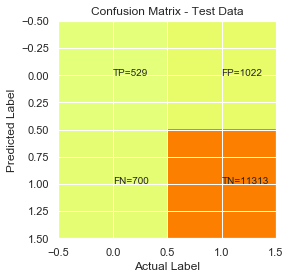

In [57]:
y_predict = abcl.predict(x_test)
# Accuracy score
print(abcl.score(x_test, y_test))

# Confusion matrix(cm)
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0])
plt.clf()
plt.imshow(cm, interpolation= 'nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')
s= [['TP', 'FP'], ['FN', 'TN']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ "="+str(cm[i][j]))
plt.show()

In [58]:
# Ensemble learning - GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state = 1)
gbcl = gbcl.fit(x_train, y_train)

0.8981126511353583


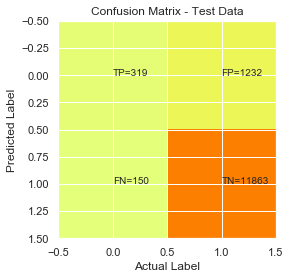

In [59]:
y_predict = gbcl.predict(x_test)
# Accuracy score
print(gbcl.score(x_test, y_test))

# Confusion matrix(cm)
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0])
plt.clf()
plt.imshow(cm, interpolation= 'nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')
s= [['TP', 'FP'], ['FN', 'TN']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ "="+str(cm[i][j]))
plt.show()

In [60]:
# Ensemble learning - RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state =1, max_features=12)
rfcl = rfcl.fit(x_train, y_train)

0.895532291359481


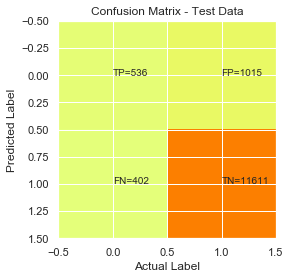

In [61]:
y_predict = rfcl.predict(x_test)
# Accuracy score
print(rfcl.score(x_test, y_test))

# Confusion matrix(cm)
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1,0])
plt.clf()
plt.imshow(cm, interpolation= 'nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Predicted Label')
plt.xlabel('Actual Label')
s= [['TP', 'FP'], ['FN', 'TN']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+ "="+str(cm[i][j]))
plt.show()

In [ ]:
# Gradient boosting gave highest accuracy compared to all the models. Random forest classifier and Bagging gave same accuracy.

# Decision tree accuracy = 86.13
# Decision tree accuracy(after regularisation) = 89
# Bagging accuracy = 89.55
# Ada Boosting accuracy = 87.3
# Gradient Boosting = 89.8
# Random Forest Classifier = 89.55

In [ ]:
# By comparing the performances of all the models, we can conclude that Ensemble model- Gradient Boosting gave highest accuracy.
# Decision tree (after regularisation), Bagging and Random Forest Classifier gave same accuracy score.
# Logistic Regression and Decision tree gave same accuracy score.
# Naive Bayes classifier gave least accuracy score.